In [56]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import os

cmap = plt.get_cmap('Set1')

def getStat(filename, stat, suite, app, i, j, k):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        if suite=="gapbs" and app=="bfs" :
            x = 0
            with open(filename) as f:
                readlines = f.readlines()
                for l in readlines:
                    if stat in l and x < (i-1):
                        x = x+1
                    elif stat in l and x == (i-1):
                        return l
                return 0.0 #for cases where stat was not found
        elif suite=="gapbs" and app=="cc" :
            x = 0
            with open(filename) as f:
                readlines = f.readlines()
                for l in readlines:
                    if stat in l and x < (j-1):
                        x = x+1
                    elif stat in l and x == (j-1):
                        return l
                return 0.0 #for cases where stat was not found
        elif suite=="gapbs" and app=="sssp" :
            x = 0
            with open(filename) as f:
                readlines = f.readlines()
                for l in readlines:
                    if stat in l and x < (k-1):
                        x = x+1
                    elif stat in l and x == (k-1):
                        return l
                return 0.0 #for cases where stat was not found
        # elif suite=="npb" and app=="ep" :
        #     x = 0
        #     with open(filename) as f:
        #         readlines = f.readlines()
        #         for l in readlines:
        #             if stat in l and x < (3-1):
        #                 x = x+1
        #             elif stat in l and x == (3-1):
        #                 return l
        #         return 0.0 #for cases where stat was not found
        else: 
            x = 0
            with open(filename) as f:
                readlines = f.readlines()
                for l in readlines:
                    if stat in l and x < 9:
                        x = x+1
                    elif stat in l and x == 9:
                        return l
                return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0

Stats = ['simSeconds ',
'hostSeconds ',
'system.mem_ctrl.readReqs ',
'system.mem_ctrl.writeReqs ',
'system.mem_ctrl.servicedByWrQ ',
'system.mem_ctrl.mergedWrBursts ',
'system.mem_ctrl.numTotHits ',
'system.mem_ctrl.numTotMisses ',
'system.mem_ctrl.numColdMisses ',
'system.mem_ctrl.numHotMisses ',
'system.mem_ctrl.numRdMissClean ',
'system.mem_ctrl.numRdMissDirty ',
'system.mem_ctrl.numRdHit ',
'system.mem_ctrl.numWrMissClean ',
'system.mem_ctrl.numWrMissDirty ',
'system.mem_ctrl.numWrHit ',
'system.mem_ctrl.numRdHitDirty ',
'system.mem_ctrl.numRdHitClean ',
'system.mem_ctrl.numWrHitDirty ',
'system.mem_ctrl.numWrHitClean ',
'system.o3Cpu0.thread_0.numInsts ',
'system.o3Cpu1.thread_0.numInsts ',
'system.o3Cpu2.thread_0.numInsts ',
'system.o3Cpu3.thread_0.numInsts ',
'system.o3Cpu4.thread_0.numInsts ',
'system.o3Cpu5.thread_0.numInsts ',
'system.o3Cpu6.thread_0.numInsts ',
'system.o3Cpu7.thread_0.numInsts ',
'system.mem_ctrl.avgRdBWSys ',
'system.mem_ctrl.avgWrBWSys ',
'system.mem_ctrl.avgORBLen ',
'system.far_mem_ctrl.avgRdBWSys ',
'system.far_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.avgRdBWSys ',
'system.loc_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.dram.readBursts ',
'system.loc_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram_2.readBursts ',
'system.loc_mem_ctrl.dram_2.writeBursts ',
'system.far_mem_ctrl.dram.readBursts ',
'system.far_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram.avgRdBW ',
'system.loc_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram_2.avgRdBW ',
'system.loc_mem_ctrl.dram_2.avgWrBW ',
'system.far_mem_ctrl.dram.avgRdBW ',
'system.far_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram.busUtil ',
'system.loc_mem_ctrl.dram.busUtilRead ',
'system.loc_mem_ctrl.dram.busUtilWrite ',
'system.loc_mem_ctrl.dram_2.busUtil ',
'system.loc_mem_ctrl.dram_2.busUtilRead ',
'system.loc_mem_ctrl.dram_2.busUtilWrite ',
'system.far_mem_ctrl.dram.busUtil ',
'system.far_mem_ctrl.dram.busUtilRead ',
'system.far_mem_ctrl.dram.busUtilWrite ',
'system.far_mem_ctrl.dram.bytesRead  ',
'system.far_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram.bytesRead  ',
'system.loc_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram_2.bytesRead  ',
'system.loc_mem_ctrl.dram_2.bytesWritten  '
          ]

dfCols = [
         'app',
         'simSeconds',
         'hostSeconds',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numTotHits',
         'numTotMisses',
         'numColdMisses',
         'numHotMisses',
         'numRdMissClean',
         'numRdMissDirty',
         'numRdHit',
         'numWrMissClean',
         'numWrMissDirty',
         'numWrHit',
         'numRdHitDirty',
         'numRdHitClean',
         'numWrHitDirty',
         'numWrHitClean',
         'numInsts0',
         'numInsts1',
         'numInsts2',
         'numInsts3',
         'numInsts4',
         'numInsts5',
         'numInsts6',
         'numInsts7',
         'avgRdBWSys',
         'avgWrBWSys',
         'avgORBLen',
         'farAvgRdBWSys',
         'farAvgWrBWSys',
         'locAvgRdBWSys',
         'locAvgWrBWSys',
         'readBursts1',
         'writeBursts1',
         'readBursts2',
         'writeBursts2',
         'readBursts3',
         'writeBursts3',
         'loc1AvgRdBW',
         'loc1AvgWrBW',
         'loc2AvgRdBW',
         'loc2AvgWrBW',
         'farAvgRdBW',
         'farAvgWrBW',
         'loc1BusUtil',
         'loc1BusUtilRead',
         'loc1BusUtilWrite',
         'loc2BusUtil',
         'loc2BusUtilRead',
         'loc2BusUtilWrite',
         'farBusUtil',
         'farBusUtilRead',
         'farBusUtilWrite',
         'farBytesRead',
         'farBytesWritten',
         'loc1BytesRead',
         'loc1BytesWritten',
         'loc2BytesRead',
         'loc2BytesWritten'
         ]

In [62]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/rambus/GAPBS'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 32, 23, 11)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_gap_dc_ram = pd.DataFrame(rows, columns= dfCols)

df_gap_dc_ram['totNumInsts'] = df_gap_dc_ram['numInsts0'].astype(int)+df_gap_dc_ram['numInsts1'].astype(int)+df_gap_dc_ram['numInsts2'].astype(int)+df_gap_dc_ram['numInsts3'].astype(int)+df_gap_dc_ram['numInsts4'].astype(int)+df_gap_dc_ram['numInsts5'].astype(int)+df_gap_dc_ram['numInsts6'].astype(int)+df_gap_dc_ram['numInsts7'].astype(int)
df_gap_dc_ram['totBW'] = (df_gap_dc_ram['avgRdBWSys'].astype(float)+df_gap_dc_ram['avgWrBWSys'].astype(float))/1000000000
df_gap_dc_ram['coldRate'] = (df_gap_dc_ram['numColdMisses'].astype(float) / df_gap_dc_ram['numTotMisses'].astype(float)) *100
df_gap_dc_ram['injRate'] = (df_gap_dc_ram['readReqs'].astype(float) + df_gap_dc_ram['writeReqs'].astype(float))*64/1000000000 / df_gap_dc_ram['simSeconds'].astype(float)
df_gap_dc_ram['BIPS'] = (df_gap_dc_ram['totNumInsts'].astype(float)/1000000000)/df_gap_dc_ram['simSeconds'].astype(float)

df_gap_dc_ram['accAmp'] =  (df_gap_dc_ram['farBytesRead'].astype(float) + df_gap_dc_ram['farBytesWritten'].astype(float) +
                             df_gap_dc_ram['loc1BytesRead'].astype(float) + df_gap_dc_ram['loc1BytesWritten'].astype(float) + 
                             df_gap_dc_ram['loc2BytesRead'].astype(float) + df_gap_dc_ram['loc2BytesWritten'].astype(float)) / (df_gap_dc_ram['readReqs'].astype(float) * 64 + df_gap_dc_ram['writeReqs'].astype(float) * 64)

df_gap_dc_ram['BWBloat'] =  (df_gap_dc_ram['loc1AvgRdBW'].astype(float) + df_gap_dc_ram['loc1AvgWrBW'].astype(float) +
                             df_gap_dc_ram['loc2AvgRdBW'].astype(float) + df_gap_dc_ram['loc2AvgWrBW'].astype(float) +
                             df_gap_dc_ram['farAvgRdBW'].astype(float) + df_gap_dc_ram['farAvgWrBW'].astype(float)) / ((df_gap_dc_ram['avgRdBWSys'].astype(float) + df_gap_dc_ram['avgWrBWSys'].astype(float)) / 1000000)

df_gap_dc_ram.to_csv("/home/babaie/projects/rambusDesign/plots/case1_gap_ram.csv")

In [63]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/rambus/NPB'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_npb_dc_ram = pd.DataFrame(rows, columns= dfCols)

df_npb_dc_ram['totNumInsts'] = df_npb_dc_ram['numInsts0'].astype(int)+df_npb_dc_ram['numInsts1'].astype(int)+df_npb_dc_ram['numInsts2'].astype(int)+df_npb_dc_ram['numInsts3'].astype(int)+df_npb_dc_ram['numInsts4'].astype(int)+df_npb_dc_ram['numInsts5'].astype(int)+df_npb_dc_ram['numInsts6'].astype(int)+df_npb_dc_ram['numInsts7'].astype(int)
df_npb_dc_ram['totBW'] = (df_npb_dc_ram['avgRdBWSys'].astype(float)+df_npb_dc_ram['avgWrBWSys'].astype(float))/1000000000
df_npb_dc_ram['coldRate'] = (df_npb_dc_ram['numColdMisses'].astype(float) / df_npb_dc_ram['numTotMisses'].astype(float)) *100
df_npb_dc_ram['injRate'] = (df_npb_dc_ram['readReqs'].astype(float) + df_npb_dc_ram['writeReqs'].astype(float))*64/1000000000 / df_npb_dc_ram['simSeconds'].astype(float)
df_npb_dc_ram['BIPS'] = (df_npb_dc_ram['totNumInsts'].astype(float)/1000000000)/df_npb_dc_ram['simSeconds'].astype(float)

df_npb_dc_ram['acc_amp0'] = (df_npb_dc_ram['readBursts1'].astype(float) + df_npb_dc_ram['writeBursts1'].astype(float) + 
                            df_npb_dc_ram['readBursts2'].astype(float) + df_npb_dc_ram['writeBursts2'].astype(float) +
                            df_npb_dc_ram['readBursts3'].astype(float) + df_npb_dc_ram['writeBursts3'].astype(float) ) / (df_npb_dc_ram['readReqs'].astype(float) + df_npb_dc_ram['writeReqs'].astype(float))

df_npb_dc_ram['accAmp'] =  (df_npb_dc_ram['farBytesRead'].astype(float) + df_npb_dc_ram['farBytesWritten'].astype(float) +
                             df_npb_dc_ram['loc1BytesRead'].astype(float) + df_npb_dc_ram['loc1BytesWritten'].astype(float) + 
                             df_npb_dc_ram['loc2BytesRead'].astype(float) + df_npb_dc_ram['loc2BytesWritten'].astype(float)) / (df_npb_dc_ram['readReqs'].astype(float) * 64 + df_npb_dc_ram['writeReqs'].astype(float) * 64)

df_npb_dc_ram['BWBloat'] =  (df_npb_dc_ram['loc1AvgRdBW'].astype(float) + df_npb_dc_ram['loc1AvgWrBW'].astype(float) +
                             df_npb_dc_ram['loc2AvgRdBW'].astype(float) + df_npb_dc_ram['loc2AvgWrBW'].astype(float) +
                             df_npb_dc_ram['farAvgRdBW'].astype(float) + df_npb_dc_ram['farAvgWrBW'].astype(float)) / ((df_npb_dc_ram['avgRdBWSys'].astype(float) + df_npb_dc_ram['avgWrBWSys'].astype(float)) / 1000000)

df_npb_dc_ram.to_csv("/home/babaie/projects/rambusDesign/plots/case1_npb_ram.csv")

In [64]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/cas2pc/GAPBS'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, True, a, 30, 26, 11)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_gap_dc_cas_2pc = pd.DataFrame(rows, columns= dfCols)

df_gap_dc_cas_2pc['totNumInsts'] = df_gap_dc_cas_2pc['numInsts0'].astype(int)+df_gap_dc_cas_2pc['numInsts1'].astype(int)+df_gap_dc_cas_2pc['numInsts2'].astype(int)+df_gap_dc_cas_2pc['numInsts3'].astype(int)+df_gap_dc_cas_2pc['numInsts4'].astype(int)+df_gap_dc_cas_2pc['numInsts5'].astype(int)+df_gap_dc_cas_2pc['numInsts6'].astype(int)+df_gap_dc_cas_2pc['numInsts7'].astype(int)
df_gap_dc_cas_2pc['totBW'] = (df_gap_dc_cas_2pc['avgRdBWSys'].astype(float)+df_gap_dc_cas_2pc['avgWrBWSys'].astype(float))/1000000000
df_gap_dc_cas_2pc['coldRate'] = (df_gap_dc_cas_2pc['numColdMisses'].astype(float) / df_gap_dc_cas_2pc['numTotMisses'].astype(float)) *100
df_gap_dc_cas_2pc['injRate'] = (df_gap_dc_cas_2pc['readReqs'].astype(float) + df_gap_dc_cas_2pc['writeReqs'].astype(float))*64/1000000000 / df_gap_dc_cas_2pc['simSeconds'].astype(float)
df_gap_dc_cas_2pc['BIPS'] = (df_gap_dc_cas_2pc['totNumInsts'].astype(float)/1000000000)/df_gap_dc_cas_2pc['simSeconds'].astype(float)

df_gap_dc_cas_2pc['acc_amp0'] = (df_gap_dc_cas_2pc['readBursts1'].astype(float) + df_gap_dc_cas_2pc['writeBursts1'].astype(float) + 
                            df_gap_dc_cas_2pc['readBursts2'].astype(float) + df_gap_dc_cas_2pc['writeBursts2'].astype(float) +
                            df_gap_dc_cas_2pc['readBursts3'].astype(float) + df_gap_dc_cas_2pc['writeBursts3'].astype(float) ) / (df_gap_dc_cas_2pc['readReqs'].astype(float) + df_gap_dc_cas_2pc['writeReqs'].astype(float))

df_gap_dc_cas_2pc['accAmp'] =  (df_gap_dc_cas_2pc['farBytesRead'].astype(float) + df_gap_dc_cas_2pc['farBytesWritten'].astype(float) +
                             df_gap_dc_cas_2pc['loc1BytesRead'].astype(float) + df_gap_dc_cas_2pc['loc1BytesWritten'].astype(float) + 
                             df_gap_dc_cas_2pc['loc2BytesRead'].astype(float) + df_gap_dc_cas_2pc['loc2BytesWritten'].astype(float)) / (df_gap_dc_cas_2pc['readReqs'].astype(float) * 64 + df_gap_dc_cas_2pc['writeReqs'].astype(float) * 64)

df_gap_dc_cas_2pc['BWBloat'] =  (df_gap_dc_cas_2pc['loc1AvgRdBW'].astype(float) + df_gap_dc_cas_2pc['loc1AvgWrBW'].astype(float) +
                             df_gap_dc_cas_2pc['loc2AvgRdBW'].astype(float) + df_gap_dc_cas_2pc['loc2AvgWrBW'].astype(float) +
                             df_gap_dc_cas_2pc['farAvgRdBW'].astype(float) + df_gap_dc_cas_2pc['farAvgWrBW'].astype(float)) / ((df_gap_dc_cas_2pc['avgRdBWSys'].astype(float) + df_gap_dc_cas_2pc['avgWrBWSys'].astype(float)) / 1000000)

df_gap_dc_cas_2pc.to_csv("/home/babaie/projects/rambusDesign/plots/case1_gap_cas_2pc.csv")

In [65]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/cas2pc/NPB'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, False, "wrong", -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_npb_dc_cas_2pc = pd.DataFrame(rows, columns= dfCols)

df_npb_dc_cas_2pc['totNumInsts'] = df_npb_dc_cas_2pc['numInsts0'].astype(int)+df_npb_dc_cas_2pc['numInsts1'].astype(int)+df_npb_dc_cas_2pc['numInsts2'].astype(int)+df_npb_dc_cas_2pc['numInsts3'].astype(int)+df_npb_dc_cas_2pc['numInsts4'].astype(int)+df_npb_dc_cas_2pc['numInsts5'].astype(int)+df_npb_dc_cas_2pc['numInsts6'].astype(int)+df_npb_dc_cas_2pc['numInsts7'].astype(int)
df_npb_dc_cas_2pc['totBW'] = (df_npb_dc_cas_2pc['avgRdBWSys'].astype(float)+df_npb_dc_cas_2pc['avgWrBWSys'].astype(float))/1000000000
df_npb_dc_cas_2pc['coldRate'] = (df_npb_dc_cas_2pc['numColdMisses'].astype(float) / df_npb_dc_cas_2pc['numTotMisses'].astype(float)) *100
df_npb_dc_cas_2pc['injRate'] = (df_npb_dc_cas_2pc['readReqs'].astype(float) + df_npb_dc_cas_2pc['writeReqs'].astype(float))*64/1000000000 / df_npb_dc_cas_2pc['simSeconds'].astype(float)
df_npb_dc_cas_2pc['BIPS'] = (df_npb_dc_cas_2pc['totNumInsts'].astype(float)/1000000000)/df_npb_dc_cas_2pc['simSeconds'].astype(float)

df_npb_dc_cas_2pc['acc_amp0'] = (df_npb_dc_cas_2pc['readBursts1'].astype(float) + df_npb_dc_cas_2pc['writeBursts1'].astype(float) + 
                            df_npb_dc_cas_2pc['readBursts2'].astype(float) + df_npb_dc_cas_2pc['writeBursts2'].astype(float) +
                            df_npb_dc_cas_2pc['readBursts3'].astype(float) + df_npb_dc_cas_2pc['writeBursts3'].astype(float) ) / (df_npb_dc_cas_2pc['readReqs'].astype(float) + df_npb_dc_cas_2pc['writeReqs'].astype(float))

df_npb_dc_cas_2pc['accAmp'] =  (df_npb_dc_cas_2pc['farBytesRead'].astype(float) + df_npb_dc_cas_2pc['farBytesWritten'].astype(float) +
                             df_npb_dc_cas_2pc['loc1BytesRead'].astype(float) + df_npb_dc_cas_2pc['loc1BytesWritten'].astype(float) + 
                             df_npb_dc_cas_2pc['loc2BytesRead'].astype(float) + df_npb_dc_cas_2pc['loc2BytesWritten'].astype(float)) / (df_npb_dc_cas_2pc['readReqs'].astype(float) * 64 + df_npb_dc_cas_2pc['writeReqs'].astype(float) * 64)

df_npb_dc_cas_2pc['BWBloat'] =  (df_npb_dc_cas_2pc['loc1AvgRdBW'].astype(float) + df_npb_dc_cas_2pc['loc1AvgWrBW'].astype(float) +
                             df_npb_dc_cas_2pc['loc2AvgRdBW'].astype(float) + df_npb_dc_cas_2pc['loc2AvgWrBW'].astype(float) +
                             df_npb_dc_cas_2pc['farAvgRdBW'].astype(float) + df_npb_dc_cas_2pc['farAvgWrBW'].astype(float)) / ((df_npb_dc_cas_2pc['avgRdBWSys'].astype(float) + df_npb_dc_cas_2pc['avgWrBWSys'].astype(float)) / 1000000)

df_npb_dc_cas_2pc.to_csv("/home/babaie/projects/rambusDesign/plots/case1_npb_cas_2pc.csv")

In [66]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/cas1pc/GAPBS'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 27, 27, 12)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_gap_dc_cas_1pc = pd.DataFrame(rows, columns= dfCols)

df_gap_dc_cas_1pc['totNumInsts'] = df_gap_dc_cas_1pc['numInsts0'].astype(int)+df_gap_dc_cas_1pc['numInsts1'].astype(int)+df_gap_dc_cas_1pc['numInsts2'].astype(int)+df_gap_dc_cas_1pc['numInsts3'].astype(int)+df_gap_dc_cas_1pc['numInsts4'].astype(int)+df_gap_dc_cas_1pc['numInsts5'].astype(int)+df_gap_dc_cas_1pc['numInsts6'].astype(int)+df_gap_dc_cas_1pc['numInsts7'].astype(int)
df_gap_dc_cas_1pc['totBW'] = (df_gap_dc_cas_1pc['avgRdBWSys'].astype(float)+df_gap_dc_cas_1pc['avgWrBWSys'].astype(float))/1000000000
df_gap_dc_cas_1pc['coldRate'] = (df_gap_dc_cas_1pc['numColdMisses'].astype(float) / df_gap_dc_cas_1pc['numTotMisses'].astype(float)) *100
df_gap_dc_cas_1pc['injRate'] = (df_gap_dc_cas_1pc['readReqs'].astype(float) + df_gap_dc_cas_1pc['writeReqs'].astype(float))*64/1000000000 / df_gap_dc_cas_1pc['simSeconds'].astype(float)
df_gap_dc_cas_1pc['BIPS'] = (df_gap_dc_cas_1pc['totNumInsts'].astype(float)/1000000000)/df_gap_dc_cas_1pc['simSeconds'].astype(float)

df_gap_dc_cas_1pc['acc_amp0'] = (df_gap_dc_cas_1pc['readBursts1'].astype(float) + df_gap_dc_cas_1pc['writeBursts1'].astype(float) + 
                            df_gap_dc_cas_1pc['readBursts2'].astype(float) + df_gap_dc_cas_1pc['writeBursts2'].astype(float) +
                            df_gap_dc_cas_1pc['readBursts3'].astype(float) + df_gap_dc_cas_1pc['writeBursts3'].astype(float) ) / (df_gap_dc_cas_1pc['readReqs'].astype(float) + df_gap_dc_cas_1pc['writeReqs'].astype(float))

df_gap_dc_cas_1pc['accAmp'] =  (df_gap_dc_cas_1pc['farBytesRead'].astype(float) + df_gap_dc_cas_1pc['farBytesWritten'].astype(float) +
                             df_gap_dc_cas_1pc['loc1BytesRead'].astype(float) + df_gap_dc_cas_1pc['loc1BytesWritten'].astype(float) + 
                             df_gap_dc_cas_1pc['loc2BytesRead'].astype(float) + df_gap_dc_cas_1pc['loc2BytesWritten'].astype(float)) / (df_gap_dc_cas_1pc['readReqs'].astype(float) * 64 + df_gap_dc_cas_1pc['writeReqs'].astype(float) * 64)

df_gap_dc_cas_1pc['BWBloat'] =  (df_gap_dc_cas_1pc['loc1AvgRdBW'].astype(float) + df_gap_dc_cas_1pc['loc1AvgWrBW'].astype(float) +
                             df_gap_dc_cas_1pc['loc2AvgRdBW'].astype(float) + df_gap_dc_cas_1pc['loc2AvgWrBW'].astype(float) +
                             df_gap_dc_cas_1pc['farAvgRdBW'].astype(float) + df_gap_dc_cas_1pc['farAvgWrBW'].astype(float)) / ((df_gap_dc_cas_1pc['avgRdBWSys'].astype(float) + df_gap_dc_cas_1pc['avgWrBWSys'].astype(float)) / 1000000)

df_gap_dc_cas_1pc.to_csv("/home/babaie/projects/rambusDesign/plots/case1_gap_cas_1pc.csv")

In [67]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/cas1pc/NPB'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, False, "wrong", -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_npb_dc_cas_1pc = pd.DataFrame(rows, columns= dfCols)

df_npb_dc_cas_1pc['totNumInsts'] = df_npb_dc_cas_1pc['numInsts0'].astype(int)+df_npb_dc_cas_1pc['numInsts1'].astype(int)+df_npb_dc_cas_1pc['numInsts2'].astype(int)+df_npb_dc_cas_1pc['numInsts3'].astype(int)+df_npb_dc_cas_1pc['numInsts4'].astype(int)+df_npb_dc_cas_1pc['numInsts5'].astype(int)+df_npb_dc_cas_1pc['numInsts6'].astype(int)+df_npb_dc_cas_1pc['numInsts7'].astype(int)
df_npb_dc_cas_1pc['totBW'] = (df_npb_dc_cas_1pc['avgRdBWSys'].astype(float)+df_npb_dc_cas_1pc['avgWrBWSys'].astype(float))/1000000000
df_npb_dc_cas_1pc['coldRate'] = (df_npb_dc_cas_1pc['numColdMisses'].astype(float) / df_npb_dc_cas_1pc['numTotMisses'].astype(float)) *100
df_npb_dc_cas_1pc['injRate'] = (df_npb_dc_cas_1pc['readReqs'].astype(float) + df_npb_dc_cas_1pc['writeReqs'].astype(float))*64/1000000000 / df_npb_dc_cas_1pc['simSeconds'].astype(float)
df_npb_dc_cas_1pc['BIPS'] = (df_npb_dc_cas_1pc['totNumInsts'].astype(float)/1000000000)/df_npb_dc_cas_1pc['simSeconds'].astype(float)

df_npb_dc_cas_1pc['acc_amp0'] = (df_npb_dc_cas_1pc['readBursts1'].astype(float) + df_npb_dc_cas_1pc['writeBursts1'].astype(float) + 
                            df_npb_dc_cas_1pc['readBursts2'].astype(float) + df_npb_dc_cas_1pc['writeBursts2'].astype(float) +
                            df_npb_dc_cas_1pc['readBursts3'].astype(float) + df_npb_dc_cas_1pc['writeBursts3'].astype(float) ) / (df_npb_dc_cas_1pc['readReqs'].astype(float) + df_npb_dc_cas_1pc['writeReqs'].astype(float))

df_npb_dc_cas_1pc['accAmp'] =  (df_npb_dc_cas_1pc['farBytesRead'].astype(float) + df_npb_dc_cas_1pc['farBytesWritten'].astype(float) +
                             df_npb_dc_cas_1pc['loc1BytesRead'].astype(float) + df_npb_dc_cas_1pc['loc1BytesWritten'].astype(float) + 
                             df_npb_dc_cas_1pc['loc2BytesRead'].astype(float) + df_npb_dc_cas_1pc['loc2BytesWritten'].astype(float)) / (df_npb_dc_cas_1pc['readReqs'].astype(float) * 64 + df_npb_dc_cas_1pc['writeReqs'].astype(float) * 64)

df_npb_dc_cas_1pc['BWBloat'] =  (df_npb_dc_cas_1pc['loc1AvgRdBW'].astype(float) + df_npb_dc_cas_1pc['loc1AvgWrBW'].astype(float) +
                             df_npb_dc_cas_1pc['loc2AvgRdBW'].astype(float) + df_npb_dc_cas_1pc['loc2AvgWrBW'].astype(float) +
                             df_npb_dc_cas_1pc['farAvgRdBW'].astype(float) + df_npb_dc_cas_1pc['farAvgWrBW'].astype(float)) / ((df_npb_dc_cas_1pc['avgRdBWSys'].astype(float) + df_npb_dc_cas_1pc['avgWrBWSys'].astype(float)) / 1000000)

df_npb_dc_cas_1pc.to_csv("/home/babaie/projects/rambusDesign/plots/case1_npb_cas_1pc.csv")

In [68]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/alloy1pc/GAPBS'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 25, 24, 12)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_gap_dc_alloy = pd.DataFrame(rows, columns= dfCols)

df_gap_dc_alloy['totNumInsts'] = df_gap_dc_alloy['numInsts0'].astype(int)+df_gap_dc_alloy['numInsts1'].astype(int)+df_gap_dc_alloy['numInsts2'].astype(int)+df_gap_dc_alloy['numInsts3'].astype(int)+df_gap_dc_alloy['numInsts4'].astype(int)+df_gap_dc_alloy['numInsts5'].astype(int)+df_gap_dc_alloy['numInsts6'].astype(int)+df_gap_dc_alloy['numInsts7'].astype(int)
df_gap_dc_alloy['totBW'] = (df_gap_dc_alloy['avgRdBWSys'].astype(float)+df_gap_dc_alloy['avgWrBWSys'].astype(float))/1000000000
df_gap_dc_alloy['coldRate'] = (df_gap_dc_alloy['numColdMisses'].astype(float) / df_gap_dc_alloy['numTotMisses'].astype(float)) *100
df_gap_dc_alloy['injRate'] = (df_gap_dc_alloy['readReqs'].astype(float) + df_gap_dc_alloy['writeReqs'].astype(float))*64/1000000000 / df_gap_dc_alloy['simSeconds'].astype(float)
df_gap_dc_alloy['BIPS'] = (df_gap_dc_alloy['totNumInsts'].astype(float)/1000000000)/df_gap_dc_alloy['simSeconds'].astype(float)

df_gap_dc_alloy['acc_amp0'] = (df_gap_dc_alloy['readBursts1'].astype(float) + df_gap_dc_alloy['writeBursts1'].astype(float) + 
                            df_gap_dc_alloy['readBursts2'].astype(float) + df_gap_dc_alloy['writeBursts2'].astype(float) +
                            df_gap_dc_alloy['readBursts3'].astype(float) + df_gap_dc_alloy['writeBursts3'].astype(float) ) / (df_gap_dc_alloy['readReqs'].astype(float) + df_gap_dc_alloy['writeReqs'].astype(float))

df_gap_dc_alloy['accAmp'] =  (df_gap_dc_alloy['farBytesRead'].astype(float) + df_gap_dc_alloy['farBytesWritten'].astype(float) +
                             df_gap_dc_alloy['loc1BytesRead'].astype(float) + df_gap_dc_alloy['loc1BytesWritten'].astype(float) + 
                             df_gap_dc_alloy['loc2BytesRead'].astype(float) + df_gap_dc_alloy['loc2BytesWritten'].astype(float)) / (df_gap_dc_alloy['readReqs'].astype(float) * 64 + df_gap_dc_alloy['writeReqs'].astype(float) * 64)

df_gap_dc_alloy['BWBloat'] =  (df_gap_dc_alloy['loc1AvgRdBW'].astype(float) + df_gap_dc_alloy['loc1AvgWrBW'].astype(float) +
                             df_gap_dc_alloy['loc2AvgRdBW'].astype(float) + df_gap_dc_alloy['loc2AvgWrBW'].astype(float) +
                             df_gap_dc_alloy['farAvgRdBW'].astype(float) + df_gap_dc_alloy['farAvgWrBW'].astype(float)) / ((df_gap_dc_alloy['avgRdBWSys'].astype(float) + df_gap_dc_alloy['avgWrBWSys'].astype(float)) / 1000000)

df_gap_dc_alloy.to_csv("/home/babaie/projects/rambusDesign/plots/case1_gap_alloy.csv")

In [69]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/alloy1pc/NPB'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, False, "wrong", -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_npb_dc_alloy = pd.DataFrame(rows, columns= dfCols)

df_npb_dc_alloy['totNumInsts'] = df_npb_dc_alloy['numInsts0'].astype(int)+df_npb_dc_alloy['numInsts1'].astype(int)+df_npb_dc_alloy['numInsts2'].astype(int)+df_npb_dc_alloy['numInsts3'].astype(int)+df_npb_dc_alloy['numInsts4'].astype(int)+df_npb_dc_alloy['numInsts5'].astype(int)+df_npb_dc_alloy['numInsts6'].astype(int)+df_npb_dc_alloy['numInsts7'].astype(int)
df_npb_dc_alloy['totBW'] = (df_npb_dc_alloy['avgRdBWSys'].astype(float)+df_npb_dc_alloy['avgWrBWSys'].astype(float))/1000000000
df_npb_dc_alloy['coldRate'] = (df_npb_dc_alloy['numColdMisses'].astype(float) / df_npb_dc_alloy['numTotMisses'].astype(float)) *100
df_npb_dc_alloy['injRate'] = (df_npb_dc_alloy['readReqs'].astype(float) + df_npb_dc_alloy['writeReqs'].astype(float))*64/1000000000 / df_npb_dc_alloy['simSeconds'].astype(float)
df_npb_dc_alloy['BIPS'] = (df_npb_dc_alloy['totNumInsts'].astype(float)/1000000000)/df_npb_dc_alloy['simSeconds'].astype(float)

df_npb_dc_alloy['acc_amp0'] = (df_npb_dc_alloy['readBursts1'].astype(float) + df_npb_dc_alloy['writeBursts1'].astype(float) + 
                            df_npb_dc_alloy['readBursts2'].astype(float) + df_npb_dc_alloy['writeBursts2'].astype(float) +
                            df_npb_dc_alloy['readBursts3'].astype(float) + df_npb_dc_alloy['writeBursts3'].astype(float) ) / (df_npb_dc_alloy['readReqs'].astype(float) + df_npb_dc_alloy['writeReqs'].astype(float))

df_npb_dc_alloy['accAmp'] =  (df_npb_dc_alloy['farBytesRead'].astype(float) + df_npb_dc_alloy['farBytesWritten'].astype(float) +
                             df_npb_dc_alloy['loc1BytesRead'].astype(float) + df_npb_dc_alloy['loc1BytesWritten'].astype(float) + 
                             df_npb_dc_alloy['loc2BytesRead'].astype(float) + df_npb_dc_alloy['loc2BytesWritten'].astype(float)) / (df_npb_dc_alloy['readReqs'].astype(float) * 64 + df_npb_dc_alloy['writeReqs'].astype(float) * 64)

df_npb_dc_alloy['BWBloat'] =  (df_npb_dc_alloy['loc1AvgRdBW'].astype(float) + df_npb_dc_alloy['loc1AvgWrBW'].astype(float) +
                             df_npb_dc_alloy['loc2AvgRdBW'].astype(float) + df_npb_dc_alloy['loc2AvgWrBW'].astype(float) +
                             df_npb_dc_alloy['farAvgRdBW'].astype(float) + df_npb_dc_alloy['farAvgWrBW'].astype(float)) / ((df_npb_dc_alloy['avgRdBWSys'].astype(float) + df_npb_dc_alloy['avgWrBWSys'].astype(float)) / 1000000)

df_npb_dc_alloy.to_csv("/home/babaie/projects/rambusDesign/plots/case1_npb_alloy.csv")

In [70]:
datadir = '/home/babaie/projects/rambusDesign/results/archived/rstr_march20_bypass_1pc/GAPBS'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 34, 26, 11)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_gap_byps_1pc = pd.DataFrame(rows, columns= dfCols)

df_gap_byps_1pc['totNumInsts'] = df_gap_byps_1pc['numInsts0'].astype(int)+df_gap_byps_1pc['numInsts1'].astype(int)+df_gap_byps_1pc['numInsts2'].astype(int)+df_gap_byps_1pc['numInsts3'].astype(int)+df_gap_byps_1pc['numInsts4'].astype(int)+df_gap_byps_1pc['numInsts5'].astype(int)+df_gap_byps_1pc['numInsts6'].astype(int)+df_gap_byps_1pc['numInsts7'].astype(int)
df_gap_byps_1pc['totBW'] = (df_gap_byps_1pc['avgRdBWSys'].astype(float)+df_gap_byps_1pc['avgWrBWSys'].astype(float))/1000000000
df_gap_byps_1pc['coldRate'] = (df_gap_byps_1pc['numColdMisses'].astype(float) / df_gap_byps_1pc['numTotMisses'].astype(float)) *100
df_gap_byps_1pc['injRate'] = (df_gap_byps_1pc['readReqs'].astype(float) + df_gap_byps_1pc['writeReqs'].astype(float))*64/1000000000 / df_gap_byps_1pc['simSeconds'].astype(float)
df_gap_byps_1pc['BIPS'] = (df_gap_byps_1pc['totNumInsts'].astype(float)/1000000000)/df_gap_byps_1pc['simSeconds'].astype(float)

df_gap_byps_1pc['acc_amp0'] = (df_gap_byps_1pc['readBursts1'].astype(float) + df_gap_byps_1pc['writeBursts1'].astype(float) + 
                            df_gap_byps_1pc['readBursts2'].astype(float) + df_gap_byps_1pc['writeBursts2'].astype(float) +
                            df_gap_byps_1pc['readBursts3'].astype(float) + df_gap_byps_1pc['writeBursts3'].astype(float) ) / (df_gap_byps_1pc['readReqs'].astype(float) + df_gap_byps_1pc['writeReqs'].astype(float))

df_gap_byps_1pc['accAmp'] =  (df_gap_byps_1pc['farBytesRead'].astype(float) + df_gap_byps_1pc['farBytesWritten'].astype(float) +
                             df_gap_byps_1pc['loc1BytesRead'].astype(float) + df_gap_byps_1pc['loc1BytesWritten'].astype(float) + 
                             df_gap_byps_1pc['loc2BytesRead'].astype(float) + df_gap_byps_1pc['loc2BytesWritten'].astype(float)) / (df_gap_byps_1pc['readReqs'].astype(float) * 64 + df_gap_byps_1pc['writeReqs'].astype(float) * 64)

df_gap_byps_1pc['BWBloat'] =  (df_gap_byps_1pc['loc1AvgRdBW'].astype(float) + df_gap_byps_1pc['loc1AvgWrBW'].astype(float) +
                             df_gap_byps_1pc['loc2AvgRdBW'].astype(float) + df_gap_byps_1pc['loc2AvgWrBW'].astype(float) +
                             df_gap_byps_1pc['farAvgRdBW'].astype(float) + df_gap_byps_1pc['farAvgWrBW'].astype(float)) / ((df_gap_byps_1pc['avgRdBWSys'].astype(float) + df_gap_byps_1pc['avgWrBWSys'].astype(float)) / 1000000)

df_gap_byps_1pc.to_csv("/home/babaie/projects/rambusDesign/plots/case1_gap_byps_1pc.csv")

In [71]:
datadir = '/home/babaie/projects/rambusDesign/results/archived/rstr_march20_bypass_1pc/NPB'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, False, "wrong", -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_npb_byps_1pc = pd.DataFrame(rows, columns= dfCols)

df_npb_byps_1pc['totNumInsts'] = df_npb_byps_1pc['numInsts0'].astype(int)+df_npb_byps_1pc['numInsts1'].astype(int)+df_npb_byps_1pc['numInsts2'].astype(int)+df_npb_byps_1pc['numInsts3'].astype(int)+df_npb_byps_1pc['numInsts4'].astype(int)+df_npb_byps_1pc['numInsts5'].astype(int)+df_npb_byps_1pc['numInsts6'].astype(int)+df_npb_byps_1pc['numInsts7'].astype(int)
df_npb_byps_1pc['totBW'] = (df_npb_byps_1pc['avgRdBWSys'].astype(float)+df_npb_byps_1pc['avgWrBWSys'].astype(float))/1000000000
df_npb_byps_1pc['coldRate'] = (df_npb_byps_1pc['numColdMisses'].astype(float) / df_npb_byps_1pc['numTotMisses'].astype(float)) *100
df_npb_byps_1pc['injRate'] = (df_npb_byps_1pc['readReqs'].astype(float) + df_npb_byps_1pc['writeReqs'].astype(float))*64/1000000000 / df_npb_byps_1pc['simSeconds'].astype(float)
df_npb_byps_1pc['BIPS'] = (df_npb_byps_1pc['totNumInsts'].astype(float)/1000000000)/df_npb_byps_1pc['simSeconds'].astype(float)

df_npb_byps_1pc['acc_amp0'] = (df_npb_byps_1pc['readBursts1'].astype(float) + df_npb_byps_1pc['writeBursts1'].astype(float) + 
                            df_npb_byps_1pc['readBursts2'].astype(float) + df_npb_byps_1pc['writeBursts2'].astype(float) +
                            df_npb_byps_1pc['readBursts3'].astype(float) + df_npb_byps_1pc['writeBursts3'].astype(float) ) / (df_npb_byps_1pc['readReqs'].astype(float) + df_npb_byps_1pc['writeReqs'].astype(float))

df_npb_byps_1pc['accAmp'] =  (df_npb_byps_1pc['farBytesRead'].astype(float) + df_npb_byps_1pc['farBytesWritten'].astype(float) +
                             df_npb_byps_1pc['loc1BytesRead'].astype(float) + df_npb_byps_1pc['loc1BytesWritten'].astype(float) + 
                             df_npb_byps_1pc['loc2BytesRead'].astype(float) + df_npb_byps_1pc['loc2BytesWritten'].astype(float)) / (df_npb_byps_1pc['readReqs'].astype(float) * 64 + df_npb_byps_1pc['writeReqs'].astype(float) * 64)

df_npb_byps_1pc['BWBloat'] =  (df_npb_byps_1pc['loc1AvgRdBW'].astype(float) + df_npb_byps_1pc['loc1AvgWrBW'].astype(float) +
                             df_npb_byps_1pc['loc2AvgRdBW'].astype(float) + df_npb_byps_1pc['loc2AvgWrBW'].astype(float) +
                             df_npb_byps_1pc['farAvgRdBW'].astype(float) + df_npb_byps_1pc['farAvgWrBW'].astype(float)) / ((df_npb_byps_1pc['avgRdBWSys'].astype(float) + df_npb_byps_1pc['avgWrBWSys'].astype(float)) / 1000000)

df_npb_byps_1pc.to_csv("/home/babaie/projects/rambusDesign/plots/case1_npb_byps_1pc.csv")

In [72]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/bypsDDR4/GAPBS'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 34, 26, 11)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_gap_byps_ddr4 = pd.DataFrame(rows, columns= dfCols)

df_gap_byps_ddr4['totNumInsts'] = df_gap_byps_ddr4['numInsts0'].astype(int)+df_gap_byps_ddr4['numInsts1'].astype(int)+df_gap_byps_ddr4['numInsts2'].astype(int)+df_gap_byps_ddr4['numInsts3'].astype(int)+df_gap_byps_ddr4['numInsts4'].astype(int)+df_gap_byps_ddr4['numInsts5'].astype(int)+df_gap_byps_ddr4['numInsts6'].astype(int)+df_gap_byps_ddr4['numInsts7'].astype(int)
df_gap_byps_ddr4['totBW'] = (df_gap_byps_ddr4['avgRdBWSys'].astype(float)+df_gap_byps_ddr4['avgWrBWSys'].astype(float))/1000000000
df_gap_byps_ddr4['coldRate'] = (df_gap_byps_ddr4['numColdMisses'].astype(float) / df_gap_byps_ddr4['numTotMisses'].astype(float)) *100
df_gap_byps_ddr4['injRate'] = (df_gap_byps_ddr4['readReqs'].astype(float) + df_gap_byps_ddr4['writeReqs'].astype(float))*64/1000000000 / df_gap_byps_ddr4['simSeconds'].astype(float)
df_gap_byps_ddr4['BIPS'] = (df_gap_byps_ddr4['totNumInsts'].astype(float)/1000000000)/df_gap_byps_ddr4['simSeconds'].astype(float)

df_gap_byps_ddr4['acc_amp0'] = (df_gap_byps_ddr4['readBursts1'].astype(float) + df_gap_byps_ddr4['writeBursts1'].astype(float) + 
                            df_gap_byps_ddr4['readBursts2'].astype(float) + df_gap_byps_ddr4['writeBursts2'].astype(float) +
                            df_gap_byps_ddr4['readBursts3'].astype(float) + df_gap_byps_ddr4['writeBursts3'].astype(float) ) / (df_gap_byps_ddr4['readReqs'].astype(float) + df_gap_byps_ddr4['writeReqs'].astype(float))

df_gap_byps_ddr4['accAmp'] =  (df_gap_byps_ddr4['farBytesRead'].astype(float) + df_gap_byps_ddr4['farBytesWritten'].astype(float) +
                             df_gap_byps_ddr4['loc1BytesRead'].astype(float) + df_gap_byps_ddr4['loc1BytesWritten'].astype(float) + 
                             df_gap_byps_ddr4['loc2BytesRead'].astype(float) + df_gap_byps_ddr4['loc2BytesWritten'].astype(float)) / (df_gap_byps_ddr4['readReqs'].astype(float) * 64 + df_gap_byps_ddr4['writeReqs'].astype(float) * 64)

df_gap_byps_ddr4['BWBloat'] =  (df_gap_byps_ddr4['loc1AvgRdBW'].astype(float) + df_gap_byps_ddr4['loc1AvgWrBW'].astype(float) +
                             df_gap_byps_ddr4['loc2AvgRdBW'].astype(float) + df_gap_byps_ddr4['loc2AvgWrBW'].astype(float) +
                             df_gap_byps_ddr4['farAvgRdBW'].astype(float) + df_gap_byps_ddr4['farAvgWrBW'].astype(float)) / ((df_gap_byps_ddr4['avgRdBWSys'].astype(float) + df_gap_byps_ddr4['avgWrBWSys'].astype(float)) / 1000000)

df_gap_byps_ddr4.to_csv("/home/babaie/projects/rambusDesign/plots/case1_gap_byps_ddr4.csv")

In [73]:
datadir = '/home/babaie/projects/rambusDesign/results/baseline_noOpt/bypsDDR4/NPB'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, False, "wrong", -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_npb_byps_ddr4 = pd.DataFrame(rows, columns= dfCols)

df_npb_byps_ddr4['totNumInsts'] = df_npb_byps_ddr4['numInsts0'].astype(int)+df_npb_byps_ddr4['numInsts1'].astype(int)+df_npb_byps_ddr4['numInsts2'].astype(int)+df_npb_byps_ddr4['numInsts3'].astype(int)+df_npb_byps_ddr4['numInsts4'].astype(int)+df_npb_byps_ddr4['numInsts5'].astype(int)+df_npb_byps_ddr4['numInsts6'].astype(int)+df_npb_byps_ddr4['numInsts7'].astype(int)
df_npb_byps_ddr4['totBW'] = (df_npb_byps_ddr4['avgRdBWSys'].astype(float)+df_npb_byps_ddr4['avgWrBWSys'].astype(float))/1000000000
df_npb_byps_ddr4['coldRate'] = (df_npb_byps_ddr4['numColdMisses'].astype(float) / df_npb_byps_ddr4['numTotMisses'].astype(float)) *100
df_npb_byps_ddr4['injRate'] = (df_npb_byps_ddr4['readReqs'].astype(float) + df_npb_byps_ddr4['writeReqs'].astype(float))*64/1000000000 / df_npb_byps_ddr4['simSeconds'].astype(float)
df_npb_byps_ddr4['BIPS'] = (df_npb_byps_ddr4['totNumInsts'].astype(float)/1000000000)/df_npb_byps_ddr4['simSeconds'].astype(float)

df_npb_byps_ddr4['acc_amp0'] = (df_npb_byps_ddr4['readBursts1'].astype(float) + df_npb_byps_ddr4['writeBursts1'].astype(float) + 
                            df_npb_byps_ddr4['readBursts2'].astype(float) + df_npb_byps_ddr4['writeBursts2'].astype(float) +
                            df_npb_byps_ddr4['readBursts3'].astype(float) + df_npb_byps_ddr4['writeBursts3'].astype(float) ) / (df_npb_byps_ddr4['readReqs'].astype(float) + df_npb_byps_ddr4['writeReqs'].astype(float))

df_npb_byps_ddr4['accAmp'] =  (df_npb_byps_ddr4['farBytesRead'].astype(float) + df_npb_byps_ddr4['farBytesWritten'].astype(float) +
                             df_npb_byps_ddr4['loc1BytesRead'].astype(float) + df_npb_byps_ddr4['loc1BytesWritten'].astype(float) + 
                             df_npb_byps_ddr4['loc2BytesRead'].astype(float) + df_npb_byps_ddr4['loc2BytesWritten'].astype(float)) / (df_npb_byps_ddr4['readReqs'].astype(float) * 64 + df_npb_byps_ddr4['writeReqs'].astype(float) * 64)

df_npb_byps_ddr4['BWBloat'] =  (df_npb_byps_ddr4['loc1AvgRdBW'].astype(float) + df_npb_byps_ddr4['loc1AvgWrBW'].astype(float) +
                             df_npb_byps_ddr4['loc2AvgRdBW'].astype(float) + df_npb_byps_ddr4['loc2AvgWrBW'].astype(float) +
                             df_npb_byps_ddr4['farAvgRdBW'].astype(float) + df_npb_byps_ddr4['farAvgWrBW'].astype(float)) / ((df_npb_byps_ddr4['avgRdBWSys'].astype(float) + df_npb_byps_ddr4['avgWrBWSys'].astype(float)) / 1000000)

df_npb_byps_ddr4.to_csv("/home/babaie/projects/rambusDesign/plots/case1_npb_byps_ddr4.csv")

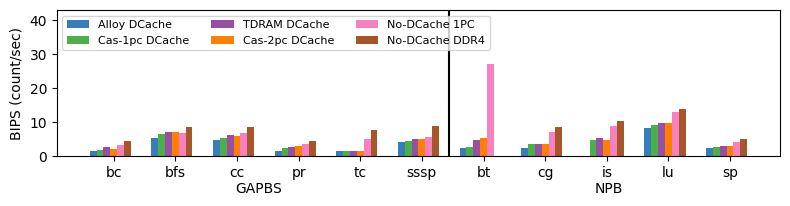

In [83]:
app_gap = df_gap_dc_cas_2pc['app']
gap_bips_alloy = df_gap_dc_alloy['BIPS']
gap_bips_cas_2pc = df_gap_dc_cas_2pc['BIPS']
gap_bips_cas_1pc = df_gap_dc_cas_1pc['BIPS']
gap_bips_ram = df_gap_dc_ram['BIPS']
gap_bips_byps_1pc = df_gap_byps_1pc['BIPS']
gap_bips_byps_ddr4 = df_gap_byps_ddr4['BIPS']

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

plt.ylim([0,43])
for i,app in enumerate(app_gap):
    plt.bar(i*9,   gap_bips_alloy[i],     width=1, color=cmap(1), label='Alloy DCache' if i==0 else None)
    plt.bar(i*9+1, gap_bips_cas_1pc[i],   width=1, color=cmap(2), label='Cas-1pc DCache' if i==0 else None)
    plt.bar(i*9+2, gap_bips_ram[i],   width=1, color=cmap(3), label='TDRAM DCache' if i==0 else None)
    plt.bar(i*9+3, gap_bips_cas_2pc[i],       width=1, color=cmap(4), label='Cas-2pc DCache' if i==0 else None)
    plt.bar(i*9+4, gap_bips_byps_1pc[i],  width=1, color=cmap(7), label='No-DCache 1PC' if i==0 else None)
    plt.bar(i*9+5, gap_bips_byps_ddr4[i], width=1, color=cmap(6), label='No-DCache DDR4' if i==0 else None)

offset = (i+6)*5-2
app_npb = df_npb_dc_cas_2pc['app']
npb_bips_alloy = df_npb_dc_alloy['BIPS']
npb_bips_cas_2pc = df_npb_dc_cas_2pc['BIPS']
npb_bips_cas_1pc = df_npb_dc_cas_1pc['BIPS']
npb_bips_ram = df_npb_dc_ram['BIPS']
npb_bips_byps_1pc = df_npb_byps_1pc['BIPS']
npb_bips_byps_ddr4 = df_npb_byps_ddr4['BIPS']
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*9+1,   npb_bips_alloy[i],     width=1, color=cmap(1))
    plt.bar(offset+i*9+2,   npb_bips_cas_1pc[i],   width=1, color=cmap(2))
    plt.bar(offset+i*9+3,   npb_bips_ram[i],   width=1, color=cmap(3))
    plt.bar(offset+i*9+4,   npb_bips_cas_2pc[i],       width=1, color=cmap(4))
    plt.bar(offset+i*9+5,   npb_bips_byps_1pc[i],  width=1, color=cmap(7))
    plt.bar(offset+i*9+6,   npb_bips_byps_ddr4[i], width=1, color=cmap(6))

plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*9+3, list(app_gap)+list(app_npb))
plt.axvline(x=offset-1, color='black')

plt.ylabel("BIPS (count/sec)")
plt.legend(fontsize=8, ncol=3)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

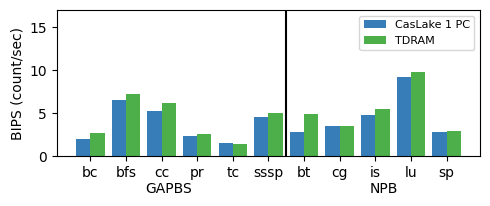

In [75]:
app_gap = df_gap_dc_cas_1pc['app']
bips_cd_alloy = df_gap_dc_cas_1pc['BIPS']
bips_cd_ram = df_gap_dc_ram['BIPS']

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,17])
for i,app in enumerate(app_gap):
    plt.bar(i*2.5,   bips_cd_alloy[i], width=1, color=cmap(1), label='CasLake 1 PC' if i==0 else None)
    plt.bar(i*2.5+1, bips_cd_ram[i], width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = (i+1)*2.5
app_npb = df_npb_dc_cas_1pc['app']
bips_cd_alloy = df_npb_dc_cas_1pc['BIPS']
bips_cd_ram = df_npb_dc_ram['BIPS']
for i,app in enumerate(app_npb): 
    plt.bar(i*2.5+offset,   bips_cd_alloy[i], width=1, color=cmap(1))
    plt.bar(i*2.5+1+offset, bips_cd_ram[i], width=1, color=cmap(2))

plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*2.5+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.75, color='black')

plt.ylabel("BIPS (count/sec)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

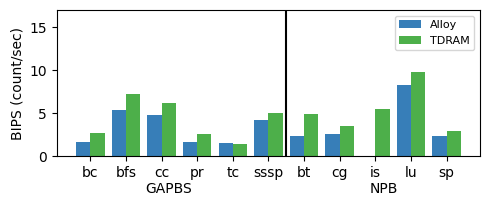

In [81]:
app_gap = df_gap_dc_alloy['app']
bips_cd_alloy = df_gap_dc_alloy['BIPS']
bips_cd_ram = df_gap_dc_ram['BIPS']

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,17])
for i,app in enumerate(app_gap):
    plt.bar(i*2.5,   bips_cd_alloy[i], width=1, color=cmap(1), label='Alloy' if i==0 else None)
    plt.bar(i*2.5+1, bips_cd_ram[i], width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = (i+1)*2.5
app_npb = df_npb_dc_alloy['app']
bips_cd_alloy = df_npb_dc_alloy['BIPS']
bips_cd_ram = df_npb_dc_ram['BIPS']
for i,app in enumerate(app_npb): 
    plt.bar(i*2.5+offset,   bips_cd_alloy[i], width=1, color=cmap(1))
    plt.bar(i*2.5+1+offset, bips_cd_ram[i], width=1, color=cmap(2))

plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*2.5+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.75, color='black')

plt.ylabel("BIPS (count/sec)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

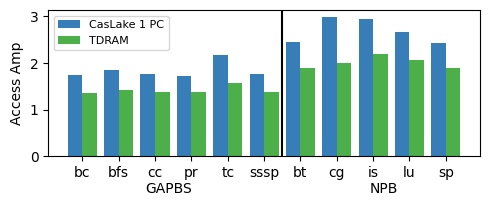

In [85]:
app_gap = df_gap_dc_cas_1pc['app']
acc_cd_cas = df_gap_dc_cas_1pc['accAmp']
acc_cd_ram = df_gap_dc_ram['accAmp']

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)


for i,app in enumerate(app_gap):
    plt.bar(i*2.5,   acc_cd_cas[i], width=1, color=cmap(1), label='CasLake 1 PC' if i==0 else None)
    plt.bar(i*2.5+1, acc_cd_ram[i], width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = (i+1)*2.5
app_npb = df_npb_dc_cas_1pc['app']
acc_cd_cas = df_npb_dc_cas_1pc['accAmp']
acc_cd_ram = df_npb_dc_ram['accAmp']
for i,app in enumerate(app_npb): 
    plt.bar(i*2.5+offset,   acc_cd_cas[i], width=1, color=cmap(1))
    plt.bar(i*2.5+1+offset, acc_cd_ram[i], width=1, color=cmap(2))

plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*2.5+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.75, color='black')

plt.ylabel("Access Amp")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

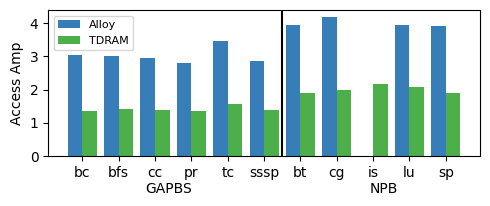

In [84]:
app_gap = df_gap_dc_alloy['app']
acc_cd_alloy = df_gap_dc_alloy['accAmp']
acc_cd_ram = df_gap_dc_ram['accAmp']

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)


for i,app in enumerate(app_gap):
    plt.bar(i*2.5,   acc_cd_alloy[i], width=1, color=cmap(1), label='Alloy' if i==0 else None)
    plt.bar(i*2.5+1, acc_cd_ram[i], width=1, color=cmap(2), label='TDRAM' if i==0 else None)

offset = (i+1)*2.5
app_npb = df_npb_dc_alloy['app']
acc_cd_alloy = df_npb_dc_alloy['accAmp']
acc_cd_ram = df_npb_dc_ram['accAmp']
for i,app in enumerate(app_npb): 
    plt.bar(i*2.5+offset,   acc_cd_alloy[i], width=1, color=cmap(1))
    plt.bar(i*2.5+1+offset, acc_cd_ram[i], width=1, color=cmap(2))

plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*2.5+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.75, color='black')

plt.ylabel("Access Amp")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

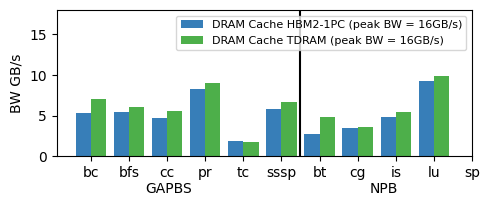

In [90]:
app_gap = df_gap_dc_cas_1pc['app']
bw_cd_cas = df_gap_dc_cas_1pc['totBW']
bw_cd_ram = df_gap_dc_ram['totBW']

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,18])
for i,app in enumerate(app_gap):
    plt.bar(i*2.5,   bw_cd_cas[i], width=1, color=cmap(1), label='DRAM Cache HBM2-1PC (peak BW = 16GB/s)' if i==0 else None)
    plt.bar(i*2.5+1, bw_cd_ram[i], width=1, color=cmap(2), label='DRAM Cache TDRAM (peak BW = 16GB/s)' if i==0 else None)

offset = (i+1)*2.5
app_npb = df_npb_dc_cas_1pc['app']
bw_cd_cas = df_npb_dc_cas_1pc['BIPS']
bw_cd_ram = df_npb_dc_ram['BIPS']
for i,app in enumerate(app): 
    plt.bar(i*2.5+offset,   bw_cd_cas[i], width=1, color=cmap(1))
    plt.bar(i*2.5+1+offset, bw_cd_ram[i], width=1, color=cmap(2))

plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*2.5+0.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.75, color='black')


plt.ylabel("BW GB/s")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

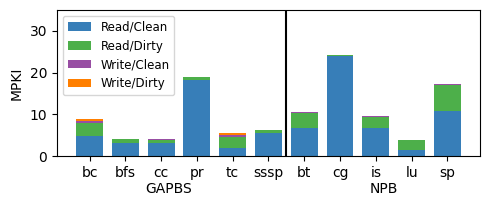

In [91]:
x1 = df_gap_dc_ram['app']
y1 = df_gap_dc_ram['numRdMissClean'].astype(float)/((df_gap_dc_ram['totNumInsts'])/1000)
y2 = df_gap_dc_ram['numRdMissDirty'].astype(float)/((df_gap_dc_ram['totNumInsts'])/1000)
y3 = df_gap_dc_ram['numWrMissClean'].astype(float)/((df_gap_dc_ram['totNumInsts'])/1000)
y4 = df_gap_dc_ram['numWrMissDirty'].astype(float)/((df_gap_dc_ram['totNumInsts'])/1000)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,35])
for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Clean' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Read/Dirty' if i==0 else None)
    plt.bar(i*4, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3), label='Write/Clean' if i==0 else None)
    plt.bar(i*4, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4), label='Write/Dirty' if i==0 else None)

offset = (i+1)*4
x2 = df_npb_dc_ram['app']
y1 = df_npb_dc_ram['numRdMissClean'].astype(float)/((df_npb_dc_ram['totNumInsts'])/1000)
y2 = df_npb_dc_ram['numRdMissDirty'].astype(float)/((df_npb_dc_ram['totNumInsts'])/1000)
y3 = df_npb_dc_ram['numWrMissClean'].astype(float)/((df_npb_dc_ram['totNumInsts'])/1000)
y4 = df_npb_dc_ram['numWrMissDirty'].astype(float)/((df_npb_dc_ram['totNumInsts'])/1000)
for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))
    plt.bar(i*4+offset, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3))
    plt.bar(i*4+offset, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4))


plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("MPKI (Ram)")
plt.legend(fontsize=8.5, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")

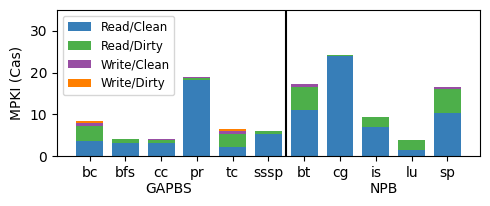

In [92]:
x1 = df_gap_dc_cas_1pc['app']
y1 = df_gap_dc_cas_1pc['numRdMissClean'].astype(float)/((df_gap_dc_cas_1pc['totNumInsts'])/1000)
y2 = df_gap_dc_cas_1pc['numRdMissDirty'].astype(float)/((df_gap_dc_cas_1pc['totNumInsts'])/1000)
y3 = df_gap_dc_cas_1pc['numWrMissClean'].astype(float)/((df_gap_dc_cas_1pc['totNumInsts'])/1000)
y4 = df_gap_dc_cas_1pc['numWrMissDirty'].astype(float)/((df_gap_dc_cas_1pc['totNumInsts'])/1000)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,35])
for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Clean' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Read/Dirty' if i==0 else None)
    plt.bar(i*4, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3), label='Write/Clean' if i==0 else None)
    plt.bar(i*4, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4), label='Write/Dirty' if i==0 else None)

offset = (i+1)*4
x2 = df_npb_dc_cas_1pc['app']
y1 = df_npb_dc_cas_1pc['numRdMissClean'].astype(float)/((df_npb_dc_cas_1pc['totNumInsts'])/1000)
y2 = df_npb_dc_cas_1pc['numRdMissDirty'].astype(float)/((df_npb_dc_cas_1pc['totNumInsts'])/1000)
y3 = df_npb_dc_cas_1pc['numWrMissClean'].astype(float)/((df_npb_dc_cas_1pc['totNumInsts'])/1000)
y4 = df_npb_dc_cas_1pc['numWrMissDirty'].astype(float)/((df_npb_dc_cas_1pc['totNumInsts'])/1000)
for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))
    plt.bar(i*4+offset, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3))
    plt.bar(i*4+offset, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4))


plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("MPKI (Cas)")
plt.legend(fontsize=8.5, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")

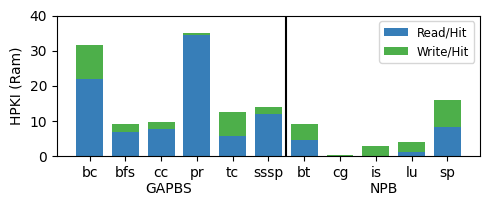

In [93]:
x1 = df_gap_dc_ram['app']
y1 = df_gap_dc_ram['numRdHitClean'].astype(float)/((df_gap_dc_ram['totNumInsts'])/1000) + df_gap_dc_ram['numRdHitDirty'].astype(float)/((df_gap_dc_ram['totNumInsts'])/1000)
y2 = df_gap_dc_ram['numWrHitClean'].astype(float)/((df_gap_dc_ram['totNumInsts'])/1000) + df_gap_dc_ram['numWrHitDirty'].astype(float)/((df_gap_dc_ram['totNumInsts'])/1000)


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,40])
for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Hit' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Write/Hit' if i==0 else None)

offset = (i+1)*4
x2 = df_npb_dc_ram['app']
y1 = df_npb_dc_ram['numRdHitClean'].astype(float)/((df_npb_dc_ram['totNumInsts'])/1000) + df_npb_dc_ram['numRdHitDirty'].astype(float)/((df_npb_dc_ram['totNumInsts'])/1000)
y2 = df_npb_dc_ram['numWrHitClean'].astype(float)/((df_npb_dc_ram['totNumInsts'])/1000) + df_npb_dc_ram['numWrHitDirty'].astype(float)/((df_npb_dc_ram['totNumInsts'])/1000)

for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))


plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("HPKI (Ram)")
plt.legend(fontsize=8.5, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_hpki.pdf")

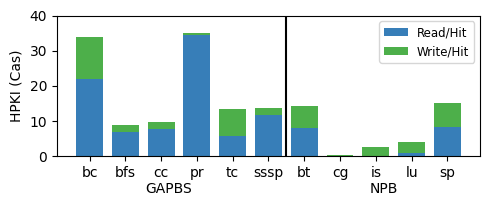

In [94]:
x1 = df_gap_dc_cas_1pc['app']
y1 = df_gap_dc_cas_1pc['numRdHitClean'].astype(float)/((df_gap_dc_cas_1pc['totNumInsts'])/1000) + df_gap_dc_cas_1pc['numRdHitDirty'].astype(float)/((df_gap_dc_cas_1pc['totNumInsts'])/1000)
y2 = df_gap_dc_cas_1pc['numWrHitClean'].astype(float)/((df_gap_dc_cas_1pc['totNumInsts'])/1000) + df_gap_dc_cas_1pc['numWrHitDirty'].astype(float)/((df_gap_dc_cas_1pc['totNumInsts'])/1000)


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,40])
for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Hit' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Write/Hit' if i==0 else None)

offset = (i+1)*4
x2 = df_npb_dc_cas_1pc['app']
y1 = df_npb_dc_cas_1pc['numRdHitClean'].astype(float)/((df_npb_dc_cas_1pc['totNumInsts'])/1000) + df_npb_dc_cas_1pc['numRdHitDirty'].astype(float)/((df_npb_dc_cas_1pc['totNumInsts'])/1000)
y2 = df_npb_dc_cas_1pc['numWrHitClean'].astype(float)/((df_npb_dc_cas_1pc['totNumInsts'])/1000) + df_npb_dc_cas_1pc['numWrHitDirty'].astype(float)/((df_npb_dc_cas_1pc['totNumInsts'])/1000)

for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))


plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("HPKI (Cas)")
plt.legend(fontsize=8.5, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_hpki.pdf")

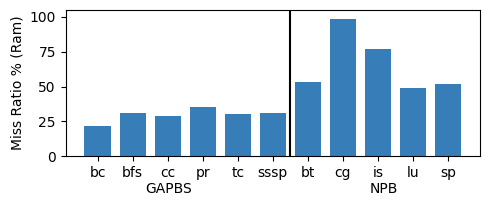

In [97]:
x1 = df_gap_dc_ram['app']
y1= 100* df_gap_dc_ram['numTotMisses'].astype(float)/(df_gap_dc_ram['numTotHits'].astype(float)+df_gap_dc_ram['numTotMisses'].astype(float))
y2 = 100*df_npb_dc_ram['numTotMisses'].astype(float)/(df_npb_dc_ram['numTotHits'].astype(float)+df_npb_dc_ram['numTotMisses'].astype(float))


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,105])
for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1))

offset = (i+1)*4
x2 = df_npb_dc_ram['app']
for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y2[i], width=3, color=cmap(1))

plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("Miss Ratio % (Ram)")
#plt.legend(fontsize=9, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_miss_ratio.pdf")

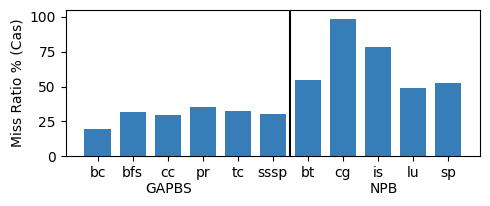

In [98]:
x1 = df_gap_dc_ram['app']
y1= 100* df_gap_dc_cas_1pc['numTotMisses'].astype(float)/(df_gap_dc_cas_1pc['numTotHits'].astype(float)+df_gap_dc_cas_1pc['numTotMisses'].astype(float))
y2 = 100*df_npb_dc_cas_1pc['numTotMisses'].astype(float)/(df_npb_dc_cas_1pc['numTotHits'].astype(float)+df_npb_dc_cas_1pc['numTotMisses'].astype(float))


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,105])
for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1))

offset = (i+1)*4
x2 = df_npb_dc_cas_1pc['app']
for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y2[i], width=3, color=cmap(1))

plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("Miss Ratio % (Cas)")
#plt.legend(fontsize=9, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_miss_ratio.pdf")

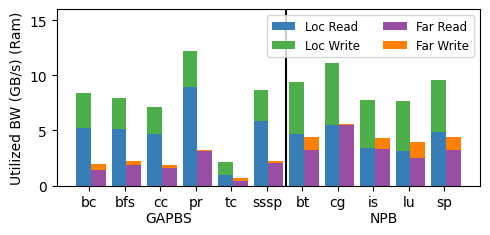

In [100]:
x1 = df_gap_dc_ram['app']
locRd = df_gap_dc_ram['locAvgRdBWSys'].astype(float)/1000000000
locWr = df_gap_dc_ram['locAvgWrBWSys'].astype(float)/1000000000
farRd = df_gap_dc_ram['farAvgRdBWSys'].astype(float)/1000000000
farWr = df_gap_dc_ram['farAvgWrBWSys'].astype(float)/1000000000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2.3)

plt.ylim([0,16])
for i,app in enumerate(x1): 
    plt.bar(i*6, locRd[i], width=2.5, color=cmap(1), label='Loc Read' if i==0 else None)
    plt.bar(i*6, locWr[i], bottom = locRd[i], width=2.5, color=cmap(2), label='Loc Write' if i==0 else None)
    plt.bar(i*6+2.5, farRd[i], width=2.5, color=cmap(3), label='Far Read' if i==0 else None)
    plt.bar(i*6+2.5, farWr[i], bottom = farRd[i], width=2.5, color=cmap(4), label='Far Write' if i==0 else None)

offset = (i+1)*6
x2 = df_npb_dc_ram['app']
locRd = df_npb_dc_ram['locAvgRdBWSys'].astype(float)/1000000000
locWr = df_npb_dc_ram['locAvgWrBWSys'].astype(float)/1000000000
farRd = df_npb_dc_ram['farAvgRdBWSys'].astype(float)/1000000000
farWr = df_npb_dc_ram['farAvgWrBWSys'].astype(float)/1000000000
for i,app in enumerate(x2): 
    plt.bar(i*6+offset, locRd[i], width=2.5, color=cmap(1))
    plt.bar(i*6+offset, locWr[i], bottom = locRd[i], width=2.5, color=cmap(2))
    plt.bar(i*6+offset+2.5, farRd[i], width=2.5, color=cmap(3))
    plt.bar(i*6+offset+2.5, farWr[i], bottom = farRd[i], width=2.5, color=cmap(4))



plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*6+1, list(x1)+list(x2))
plt.axvline(x=offset-1.75, color='black')

plt.ylabel("Utilized BW (GB/s) (Ram)")
plt.legend(fontsize=8.5, ncol=2)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bw_util.pdf")

In [ ]:
x1 = df_gap_dc_cas_1pc['app']
locRd = df_gap_dc_cas_1pc['locAvgRdBWSys'].astype(float)/1000000000
locWr = df_gap_dc_cas_1pc['locAvgWrBWSys'].astype(float)/1000000000
farRd = df_gap_dc_cas_1pc['farAvgRdBWSys'].astype(float)/1000000000
farWr = df_gap_dc_cas_1pc['farAvgWrBWSys'].astype(float)/1000000000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2.3)

plt.ylim([0,16])
for i,app in enumerate(x1): 
    plt.bar(i*6, locRd[i], width=2.5, color=cmap(1), label='Loc Read' if i==0 else None)
    plt.bar(i*6, locWr[i], bottom = locRd[i], width=2.5, color=cmap(2), label='Loc Write' if i==0 else None)
    plt.bar(i*6+2.5, farRd[i], width=2.5, color=cmap(3), label='Far Read' if i==0 else None)
    plt.bar(i*6+2.5, farWr[i], bottom = farRd[i], width=2.5, color=cmap(4), label='Far Write' if i==0 else None)

offset = (i+1)*6
x2 = df_npb_dc_cas_1pc['app']
locRd = df_npb_dc_cas_1pc['locAvgRdBWSys'].astype(float)/1000000000
locWr = df_npb_dc_cas_1pc['locAvgWrBWSys'].astype(float)/1000000000
farRd = df_npb_dc_cas_1pc['farAvgRdBWSys'].astype(float)/1000000000
farWr = df_npb_dc_cas_1pc['farAvgWrBWSys'].astype(float)/1000000000
for i,app in enumerate(x2): 
    plt.bar(i*6+offset, locRd[i], width=2.5, color=cmap(1))
    plt.bar(i*6+offset, locWr[i], bottom = locRd[i], width=2.5, color=cmap(2))
    plt.bar(i*6+offset+2.5, farRd[i], width=2.5, color=cmap(3))
    plt.bar(i*6+offset+2.5, farWr[i], bottom = farRd[i], width=2.5, color=cmap(4))



plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(11)*6+1, list(x1)+list(x2))
plt.axvline(x=offset-1.75, color='black')

plt.ylabel("Utilized BW (GB/s) (Cas)")
plt.legend(fontsize=8.5, ncol=2)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bw_util.pdf")